In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Creating a Sample Social Science Dataset
np.random.seed(1)

performance_by_pers = {
    'Age': np.random.randint(18, 25, 16),
    'Output_Score': np.random.normal (6, 2.5, 16) # (mean, standard deviation, size of sample generated) 
}

# Converting this into a Pandas DataFrame to be able to see it in a Neat, Tabular form
perf_pers = pd.DataFrame(performance_by_pers)


### NOTES:
## 'Output_Score': np.random.uniform(1, 10, 16) # Generates 16 random numbers between 1 and 10 and can include decimals
## 'Character_Performance': np.random.choice(['Exceptional', 'Average', 'Above Average', 'Below Average'], size=16)

In [5]:
# Accessing the generated data
print(perf_pers)
perf_pers

    Age  Output_Score
0    23      4.838284
1    21      8.154568
2    22     -0.635655
3    18      8.880662
4    19      6.491609
5    21      2.136965
6    23      5.779740
7    18      8.130598
8    18      7.693085
9    19      5.732804
10   22      7.813185
11   23      8.337223
12   22      8.795742
13   24      6.139033
14   19      6.941642
15   20      6.940338


,Age,Output_Score
0,23,4.838284
1,21,8.154568
2,22,-0.635655
3,18,8.880662
4,19,6.491609
5,21,2.136965
6,23,5.779740
7,18,8.130598
8,18,7.693085
9,19,5.732804


In [12]:
type('Age')

str

In [18]:
# This is How you Create an Additional Column
additional_column = {
    'Type': np.random.choice(['ESFJ', 'ENFJ', 'ESTJ', 'ENTJ', 'ISTJ', 'ISFJ', 'INTJ', 'ENFP', 'INFJ', 'ESFP', 'ENTP', 'ESTP', 'INTP', 'ISTP', 'INFP', 'ISFP'], size=16)
} 

# Converting the newly generated column (which matches with the one I wanna JOIN on in my Excel sheet) into a DataFrame
df2 = pd.DataFrame(additional_column)

# Merging the two DataFrames by Column (axis=1)
df_new = pd.concat([perf_pers, df2], axis=1)

print(df_new)

    Age  Output_Score  Type
0    23      4.838284  ESFJ
1    21      8.154568  INFJ
2    22     -0.635655  ENFP
3    18      8.880662  ENFP
4    19      6.491609  ENFJ
5    21      2.136965  ENFJ
6    23      5.779740  ISTP
7    18      8.130598  ENTJ
8    18      7.693085  ESFJ
9    19      5.732804  INFJ
10   22      7.813185  ISTP
11   23      8.337223  ISTP
12   22      8.795742  INTJ
13   24      6.139033  ISTJ
14   19      6.941642  ISFJ
15   20      6.940338  INTJ


In [40]:
# Or, We Can Do This

perf_pers['Type'] = ['ESFJ', 'ENFJ', 'ESTJ','ENTJ','ISTJ','ISFJ','INTJ','ENFP','INFJ','ESFP','ENTP','ESTP','INTP','ISTP','INFP','ISFP']
perf_pers

,Age,Output_Score,Type
0,23,4.838284,ESFJ
1,21,8.154568,ENFJ
2,22,-0.635655,ESTJ
3,18,8.880662,ENTJ
4,19,6.491609,ISTJ
5,21,2.136965,ISFJ
6,23,5.779740,INTJ
7,18,8.130598,ENFP
8,18,7.693085,INFJ
9,19,5.732804,ESFP


In [42]:
type('Type')

str

In [32]:
# Bringing in the Other Sheet - For JOINing and Subsequent Analyses

twodf = pd.read_excel(r"C:\Users\ali.rizvi\Downloads\ESFJ_ENFJ_ISFJ_INFJ_Data.xlsx")
twodf

,Type,BAM_Frequency,BAM_Ratio,BAM_Rank,BI_Frequency,BI_Ratio,BI_Rank,Total_Frequency,Total_Ratio,Total_Rank
0,ESFJ,46,0.21,1.0,30,0.22,1.0,76,0.21,1
1,ENFJ,32,0.14,2.0,27,0.20,2.0,59,0.16,2
2,ESTJ,21,0.09,5.0,26,0.19,3.0,47,0.13,3
3,ENTJ,22,0.10,4.0,13,0.10,4.0,35,0.10,4
4,ISTJ,27,0.12,3.0,6,0.04,7.0,33,0.09,5
5,ISFJ,20,0.09,6.0,7,0.05,5.5,27,0.08,6
6,INTJ,12,0.05,8.0,7,0.05,5.5,19,0.05,7
7,ENFP,12,0.05,8.0,4,0.03,9.0,16,0.04,8
8,INFJ,12,0.05,8.0,3,0.02,11.0,15,0.04,9
9,ESFP,7,0.03,10.0,4,0.03,9.0,11,0.03,10


In [43]:
type('Type')

str

In [45]:
# Merging (JOINing) the 2 DataFrames based on the "Type" column

# Check and clean up column, to be Merged on, names in both DataFrames 
perf_pers.columns = perf_pers.columns.str.strip()
twodf.columns = twodf.columns.str.strip()

# Specify the columns for Merging
on_column = 'Type'

# Performing a LEFT JOIN using Merge - all Values in both "Type" columns should be the same

data = perf_pers.merge(twodf, on = on_column, how='left') # LEFT Join

# Let's See it!

print(data)
data

,Age,Output_Score,Type,BAM_Frequency,BAM_Ratio,BAM_Rank,BI_Frequency,BI_Ratio,BI_Rank,Total_Frequency,Total_Ratio,Total_Rank
0,23,4.838284,ESFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,8.154568,ENFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22,-0.635655,ESTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,8.880662,ENTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19,6.491609,ISTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21,2.136965,ISFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,23,5.779740,INTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,18,8.130598,ENFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18,7.693085,INFJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,19,5.732804,ESFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Let's Forget this for now^ and Export the Original Table for Future Analysis in SQL
perf_pers.to_csv('performance_data.csv', index=False) # Create the "file_name" which is 'performance_data.csv' in this case

# Let's Export this CSV file to Within the "Downloads" Folder

import shutil
import os

# Getting the Current Working Directory
current_directory = os.getcwd()

# Listing files in the Current Working Directory
files_in_directory = os.listdir(current_directory)

# Print the List of Files
print("Files in the Current Working Directory:", files_in_directory)

file_name = 'performance_data.csv'

# Access the CSV file
file_path = os.path.join(current_directory, file_name)

# Specifying the Destination Directory
destination_directory = os.path.expanduser("~/Downloads")

# Moving the CSV file to the Destination Directory
shutil.move(file_path, os.path.join(destination_directory, file_name))

# Done! Can Use this Method in the Future too!^

Files in the Current Working Directory: ['.ipynb_checkpoints', 'performance_data.csv', 'Untitled.ipynb']


'C:\\Users\\ali.rizvi/Downloads\\performance_data.csv'

In [4]:
df3 = pd.read_csv(r"C:\Users\ali.rizvi\Downloads\final_personality_performance_table_csv.csv")
df3

,Age,Output_Score,Type,BAM_Frequency_,BAM_Ratio,BAM_Rank_,BI_Frequency_,BI_Ratio,BI_Rank,Total_Frequency_,Total_Ratio,Total_Rank
0,18,8.15,ENFJ,32,0.14,2.0,27,0.20,2.0,59,0.16,2
1,18,6.49,ISTJ,27,0.12,3.0,6,0.04,7.0,33,0.09,5
2,18,8.88,ENTJ,22,0.10,4.0,13,0.10,4.0,35,0.10,4
3,19,0.64,ESTJ,21,0.09,5.0,26,0.19,3.0,47,0.13,3
4,19,2.14,ISFJ,20,0.09,6.0,7,0.05,5.5,27,0.08,6
5,19,5.78,INTJ,12,0.05,8.0,7,0.05,5.5,19,0.05,7
6,20,8.13,ENFP,12,0.05,8.0,4,0.03,9.0,16,0.04,8
7,21,7.69,INFJ,12,0.05,8.0,3,0.02,11.0,15,0.04,9
8,21,5.73,ESFP,7,0.03,10.0,4,0.03,9.0,11,0.03,10
9,22,7.81,ENTP,5,0.02,11.0,4,0.03,9.0,9,0.03,11


In [46]:
df3.dropna()

,Age,Output_Score,Type,BAM_Frequency_,BAM_Ratio,BAM_Rank_,BI_Frequency_,BI_Ratio,BI_Rank,Total_Frequency_,Total_Ratio,Total_Rank
0,18,8.15,ENFJ,32,0.14,2.0,27,0.20,2.0,59,0.16,2
1,18,6.49,ISTJ,27,0.12,3.0,6,0.04,7.0,33,0.09,5
2,18,8.88,ENTJ,22,0.10,4.0,13,0.10,4.0,35,0.10,4
3,19,0.64,ESTJ,21,0.09,5.0,26,0.19,3.0,47,0.13,3
4,19,2.14,ISFJ,20,0.09,6.0,7,0.05,5.5,27,0.08,6
5,19,5.78,INTJ,12,0.05,8.0,7,0.05,5.5,19,0.05,7
6,20,8.13,ENFP,12,0.05,8.0,4,0.03,9.0,16,0.04,8
7,21,7.69,INFJ,12,0.05,8.0,3,0.02,11.0,15,0.04,9
8,21,5.73,ESFP,7,0.03,10.0,4,0.03,9.0,11,0.03,10
9,22,7.81,ENTP,5,0.02,11.0,4,0.03,9.0,9,0.03,11


In [49]:
df3.dtypes

Age                   int64
Output_Score        float64
Type                 object
BAM_Frequency_        int64
BAM_Ratio           float64
BAM_Rank_           float64
BI_Frequency_         int64
BI_Ratio            float64
BI_Rank             float64
Total_Frequency_      int64
Total_Ratio         float64
Total_Rank            int64
dtype: object

In [48]:
# Pull Up values of a certain Data Type

df3.select_dtypes(include='object') # The "object" data type is needed here, in place of "str"

,Type
0,ENFJ
1,ISTJ
2,ENTJ
3,ESTJ
4,ISFJ
5,INTJ
6,ENFP
7,INFJ
8,ESFP
9,ENTP


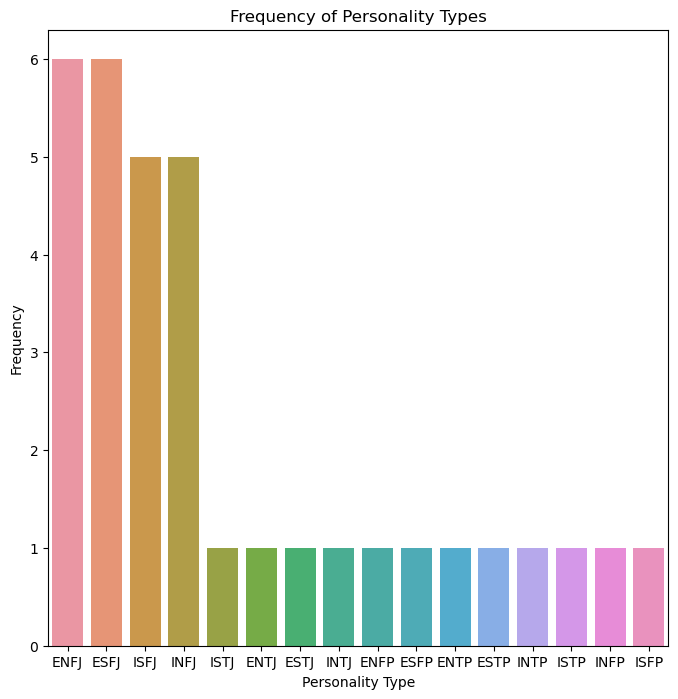

In [7]:
# Determining Personality Type on x-axis with its Frequency on y-axis

type_count = df3['Type'].value_counts() # Computes the Frequency of Each Value's Appearance in the "Type" column

plt.figure(figsize=(8,8)) # Adjusting the Size of the Plot

# The Actual Plot

sns.barplot(x = type_count.index, y = type_count.values, data=df3) # can add "orient = 'h'" after "data=df3," to make it a horizontal bar plot
# ^We add a ".values" after 'type_count' still because that will give us the array of Frequencies
plt.title('Frequency of Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Displaying Average Measures by Personality Types

data_bypers = df3.groupby('Type').mean()
data_bypers

,Age,Output_Score,BAM_Frequency_,BAM_Ratio,BAM_Rank_,BI_Frequency_,BI_Ratio,BI_Rank,Total_Frequency_,Total_Ratio,Total_Rank
Type,,,,,,,,,,,
ENFJ,21.333333,6.831667,32.0,0.14,2.0,27.0,0.20,2.0,59.0,0.16,2.0
ENFP,20.000000,8.130000,12.0,0.05,8.0,4.0,0.03,9.0,16.0,0.04,8.0
ENTJ,18.000000,8.880000,22.0,0.10,4.0,13.0,0.10,4.0,35.0,0.10,4.0
ENTP,22.000000,7.810000,5.0,0.02,11.0,4.0,0.03,9.0,9.0,0.03,11.0
ESFJ,20.333333,6.336667,46.0,0.21,1.0,30.0,0.22,1.0,76.0,0.21,1.0
ESFP,21.000000,5.730000,7.0,0.03,10.0,4.0,0.03,9.0,11.0,0.03,10.0
ESTJ,19.000000,0.640000,21.0,0.09,5.0,26.0,0.19,3.0,47.0,0.13,3.0
ESTP,22.000000,8.340000,3.0,0.01,12.0,2.0,0.01,12.0,5.0,0.01,12.0
INFJ,20.600000,6.978000,12.0,0.05,8.0,3.0,0.02,11.0,15.0,0.04,9.0


In [24]:
# Displaying Only Average Productivity Scores by the Four Main Personality Types

output_bypers = df3.groupby('Type')['Output_Score'].mean().reset_index() # Calculates Mean Score by Type but only for the "Output_Score" column
# "reset_index()"^ at the end is used to Convert the Result back into a DataFrame for better handling in the subsequent Bar plot
output_bypers

,Type,Output_Score
0,ENFJ,6.831667
1,ENFP,8.130000
2,ENTJ,8.880000
3,ENTP,7.810000
4,ESFJ,6.336667
5,ESFP,5.730000
6,ESTJ,0.640000
7,ESTP,8.340000
8,INFJ,6.978000
9,INFP,6.940000


In [37]:
productivity_by_type = output_bypers.sort_values(by="Output_Score").round(2)
productivity_by_type

,Type,Output_Score
6,ESTJ,0.64
12,ISFJ,4.30
5,ESFP,5.73
10,INTJ,5.78
15,ISTP,6.14
4,ESFJ,6.34
14,ISTJ,6.49
0,ENFJ,6.83
9,INFP,6.94
13,ISFP,6.94


In [38]:
# Let's Forget this for now^ and Export the Original Table for Future Analysis in SQL
productivity_by_type.to_csv('productivity_sorted_by_type.csv', index=False)

# Let's Export this CSV file to Within the "Downloads" Folder

import shutil
import os

# Getting the Current Working Directory
current_directory = os.getcwd()

# Listing files in the Current Working Directory
files_in_directory = os.listdir(current_directory)

# Print the List of Files
print("Files in the Current Working Directory:", files_in_directory)

file_name = 'productivity_sorted_by_type.csv'

# Access the CSV file
file_path = os.path.join(current_directory, file_name)

# Specifying the Destination Directory
destination_directory = os.path.expanduser("~/Downloads")

# Moving the CSV file to the Destination Directory
shutil.move(file_path, os.path.join(destination_directory, file_name))

# Done! Can Use this Method in the Future too!^

Files in the Current Working Directory: ['.ipynb_checkpoints', 'productivity_sorted_by_type.csv', 'Visualizations_Code.ipynb', 'Work_Personality_Performance_Project.ipynb']


'C:\\Users\\ali.rizvi/Downloads\\productivity_sorted_by_type.csv'

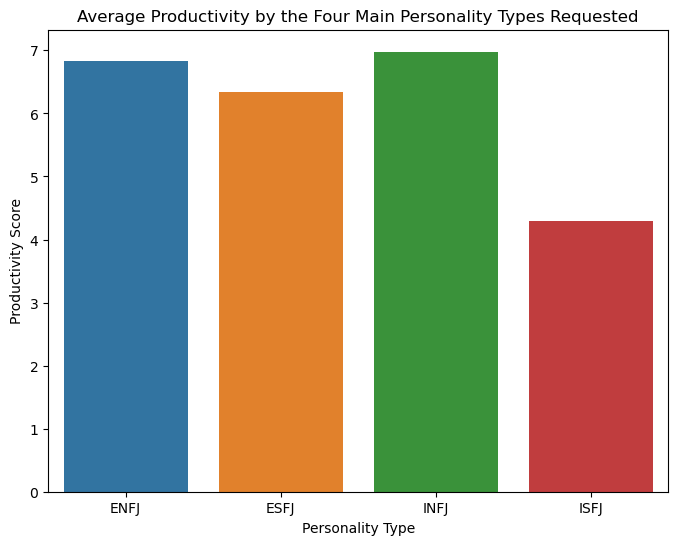

In [45]:
# Filtering Only for the Four Main Personality Types Requested and then Visualizing Only Their Respective Average Output Scores

## Specifying the Main "Type" Values
main_types = ['ESFJ', 'ISFJ', 'ENFJ', 'INFJ']

## Filtering the DataFrame for the specified "Type" Values
filtered_types = df3[df3['Type'].isin(main_types)]

## Calculating the Mean (/Average) Productivity Scores ("Output_Score") for Each 'Type'
avg_scores = filtered_types.groupby('Type')['Output_Score'].mean().reset_index()

## Adjusting the Coming Figure's Size, Early
plt.figure(figsize = (8, 6))

# Creating the Visualization, Finally
## In this case, I want to visualize how Output_Score varies across different 'Type' values. That is why both the x-axis and the y-axis are specified with the respective columns from the "avg_scores" DataFrame
sns.barplot(x=avg_scores['Type'], y=avg_scores['Output_Score']) # "avg_scores['Type']" on x-axis; the 'Type' values are Categorical data, and I want each bar to represent a different 'Type' category
# "avg_scores['Output_Score'] on y-axis; the 'Output_Score' values are Numerical data, and I want the Height of each bar to represent the Average (/Mean) 'Output_Score' for the corresponding 'Type'
plt.title('Average Productivity by the Four Main Personality Types Requested')
plt.xlabel('Personality Type')
plt.ylabel('Productivity Score')
plt.show()

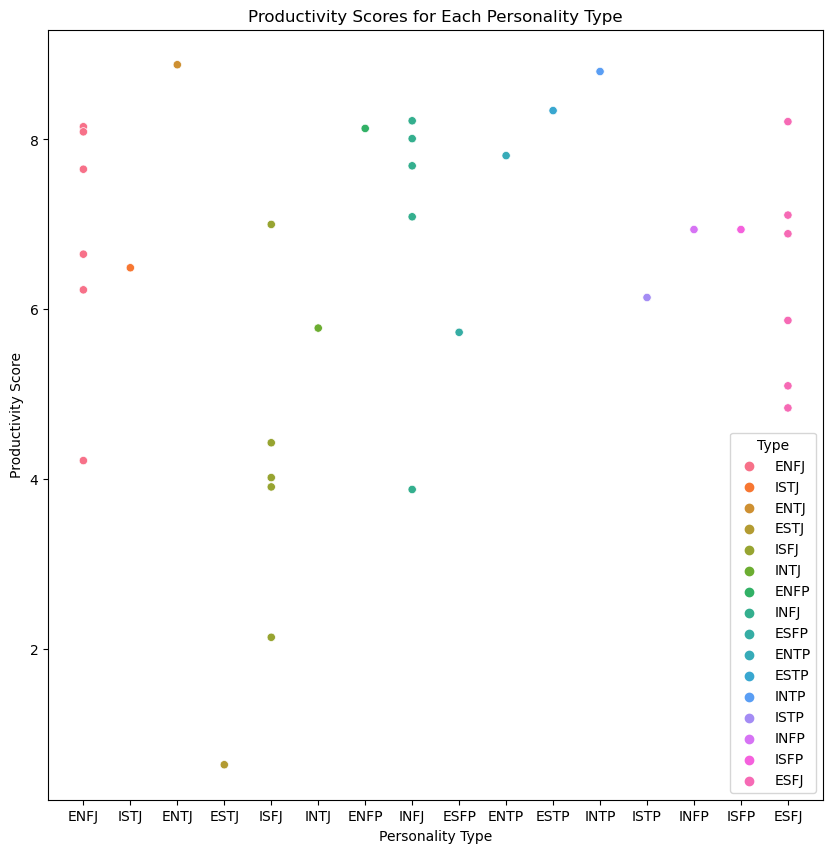

In [44]:
# Scatterplot Time!

# Configuring the Plot's Size Early
plt.figure(figsize = (10, 10))

## Creating the Scatterplot
sns.scatterplot(x = 'Type', y = 'Output_Score', hue="Type", data=df3) # The "hue" parameter enables coloring of points based on the Categorical variable (in this case; "Personality Type")
plt.title("Productivity Scores for Each Personality Type")
plt.xlabel('Personality Type')
plt.ylabel('Productivity Score')
plt.show()